In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_excel('./Data_train.xlsx')

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [7]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_data.dropna(inplace=True)

In [10]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [11]:
def change_to_datetime(col):
    train_data[col]= pd.to_datetime(train_data[col])

In [12]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_to_datetime(i)

In [13]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [15]:
train_data['Journey_Day'] = train_data['Date_of_Journey'].dt.day
train_data['Journey_Month'] = train_data['Date_of_Journey'].dt.month

In [17]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Journey_Day                 int64
Journey_Month               int64
dtype: object

In [18]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-04-13 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-04-13 05:50:00,2021-04-13 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-04-13 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-04-13 18:05:00,2021-04-13 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-04-13 16:50:00,2021-04-13 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [19]:
def extract_hour(df, col):
    df[col+'_hour']=df[col].dt.hour

In [26]:
def extract_min(df, col):
    df[col+'_min']=df[col].dt.minute

In [27]:
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [28]:
extract_hour(train_data,'Dep_Time')
extract_min(train_data, 'Dep_Time')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-04-13 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-04-13 05:50:00,2021-04-13 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-04-13 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-04-13 18:05:00,2021-04-13 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-04-13 16:50:00,2021-04-13 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


In [29]:
extract_hour(train_data,'Arrival_Time')
extract_min(train_data, 'Arrival_Time')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-04-13 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-04-13 05:50:00,2021-04-13 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-04-13 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-04-13 18:05:00,2021-04-13 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-04-13 16:50:00,2021-04-13 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [35]:
drop_column(train_data, 'Arrival_Time')


KeyError: "['Arrival_Time'] not found in axis"

In [36]:
drop_column(train_data, 'Dep_Time')

In [37]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [38]:
'5h 12m'.split(' ')

['5h', '12m']

In [39]:
duration = list(train_data['Duration'])

In [46]:
for i in range (len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i]+' 0m'
        else:
            duration[i]='0h '+duration[i]

In [47]:
train_data['Duration'] = duration

In [49]:
duration

['2h 50m',
 '7h 25m',
 '0h 19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '0h 23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '0h 22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '0h 12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '0h 3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '0h 5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '0h 10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 

In [52]:
for i in range (len(duration)):
    if duration[i].count('h')==2:
        duration[i] = duration[i][:-1]+'m'
    

In [53]:
duration

['2h 50m',
 '7h 25m',
 '0h 19m',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '0h 23m',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '0h 22m',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '0h 12m',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '0h 3m',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '0h 5m',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '0h 10m',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 

In [54]:
train_data['Duration']=duration

In [55]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,0h 19m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [56]:
def hour(x):
    return x.split(' ')[0][0:-1]

In [57]:
def min(x):
    return x.split(' ')[1][0:-1]

In [58]:
train_data['Duration_Hours'] = train_data['Duration'].apply(hour)

In [59]:
train_data['Duration_Mins'] = train_data['Duration'].apply(min)

In [60]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_Hours,Duration_Mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,0h 19m,2 stops,No info,13882,6,9,9,25,4,25,0,19
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [61]:
drop_column(train_data, 'Duration')

In [62]:
train_data.dtypes

Airline                      object
Date_of_Journey      datetime64[ns]
Source                       object
Destination                  object
Route                        object
Total_Stops                  object
Additional_Info              object
Price                         int64
Journey_Day                   int64
Journey_Month                 int64
Dep_Time_hour                 int64
Dep_Time_min                  int64
Arrival_Time_hour             int64
Arrival_Time_min              int64
Duration_Hours               object
Duration_Mins                object
dtype: object

In [63]:
train_data['Duration_Hours'] = train_data['Duration_Hours'].astype(int)
train_data['Duration_Mins'] = train_data['Duration_Mins'].astype(int)

In [64]:
train_data.dtypes

Airline                      object
Date_of_Journey      datetime64[ns]
Source                       object
Destination                  object
Route                        object
Total_Stops                  object
Additional_Info              object
Price                         int64
Journey_Day                   int64
Journey_Month                 int64
Dep_Time_hour                 int64
Dep_Time_min                  int64
Arrival_Time_hour             int64
Arrival_Time_min              int64
Duration_Hours                int32
Duration_Mins                 int32
dtype: object

In [68]:
cat_col = [col for col in train_data.columns if train_data[col].dtype=='object']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [69]:
count_col = [col for col in train_data.columns if train_data[col].dtype!='object']
count_col

['Date_of_Journey',
 'Price',
 'Journey_Day',
 'Journey_Month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'Duration_Hours',
 'Duration_Mins']

In [70]:
categorical = train_data[cat_col]

In [71]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [72]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

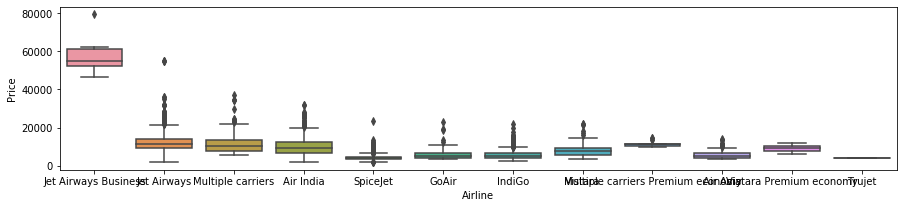

In [74]:
plt.figure(figsize=(15,3))
sns.boxplot(y='Price', x='Airline', data=train_data.sort_values('Price', ascending=False))

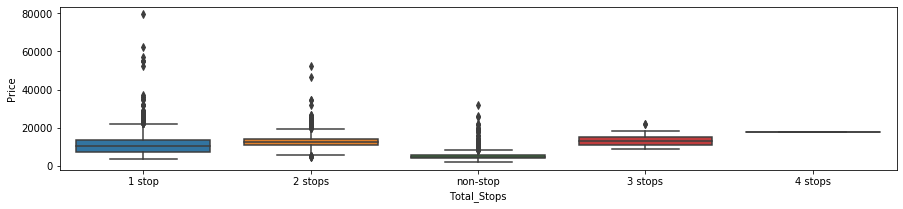

In [76]:
plt.figure(figsize=(15,3))
sns.boxplot(y='Price', x='Total_Stops', data=train_data.sort_values('Price', ascending=False))

In [80]:
categorical['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [81]:
Airline = pd.get_dummies(categorical['Airline'], drop_first=True)

In [82]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [83]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_Hours,Duration_Mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,0,19
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [84]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<Figure size 1080x216 with 0 Axes>

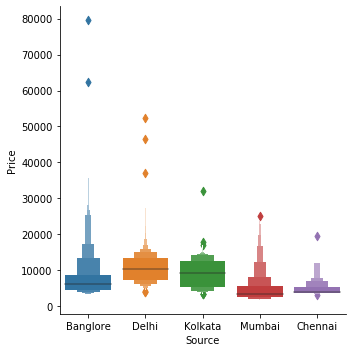

In [93]:
plt.figure(figsize=(15,3))
sns.catplot( y='Price',x='Source', data=train_data.sort_values('Price', ascending=False),kind='boxen')

In [94]:
Source = pd.get_dummies(categorical['Source'], drop_first=True)

In [96]:
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [97]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [98]:
Destination=pd.get_dummies(categorical['Destination'], drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [99]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [100]:
categorical['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
5                    CCU → BLR
6              BLR → BOM → DEL
7              BLR → BOM → DEL
8              BLR → BOM → DEL
9              DEL → BOM → COK
10             DEL → BLR → COK
11                   CCU → BLR
12                   MAA → CCU
13             CCU → BOM → BLR
14                   CCU → BLR
15       DEL → AMD → BOM → COK
16             DEL → PNQ → COK
17             DEL → BOM → COK
18       DEL → CCU → BOM → COK
19             DEL → BOM → COK
20             DEL → BOM → COK
21             BLR → COK → DEL
22                   BLR → DEL
23                   BLR → DEL
24             CCU → BOM → BLR
25       DEL → IDR → BOM → COK
26             DEL → LKO → COK
27             DEL → BOM → COK
28                   BLR → DEL
29                   MAA → CCU
                 ...          
10653          CCU → BOM → BLR
10654   

In [105]:
for feature in categorical.columns:
    print('{} has total {} categories'.format(feature, len(categorical[feature].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Route has total 128 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories


In [109]:
categorical['Route1'] = categorical['Route'].str.split('→').str[0]
categorical['Route2'] = categorical['Route'].str.split('→').str[1]
categorical['Route3'] = categorical['Route'].str.split('→').str[2]
categorical['Route4'] = categorical['Route'].str.split('→').str[3]
categorical['Route5'] = categorical['Route'].str.split('→').str[4]

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [110]:
categorical['Route1'].fillna('None',inplace=True)
categorical['Route2'].fillna('None',inplace=True)
categorical['Route3'].fillna('None',inplace=True)
categorical['Route4'].fillna('None',inplace=True)
categorical['Route5'].fillna('None',inplace=True)

In [111]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,None,None


In [112]:
from sklearn.preprocessing import LabelEncoder

In [113]:
encoder = LabelEncoder()

In [114]:
for i in ['Route1','Route2','Route3','Route4','Route5']:
    categorical[i] = encoder.fit_transform(categorical[i])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [115]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,0,34,8,13,5


In [116]:
drop_column(categorical,'Route')
drop_column(categorical,'Additional_Info')

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [118]:
categorical['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [119]:
categorical.dtypes

Airline        object
Source         object
Destination    object
Total_Stops    object
Route1          int32
Route2          int32
Route3          int32
Route4          int32
Route5          int32
dtype: object

In [121]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [122]:
dict = {'non_stop':0, '2 stops':2 , '1 stop':1, '3 stops':3, '4 stops':4}

In [123]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5


In [124]:
categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [125]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,NaN,0,13,29,13,5
1,Air India,Kolkata,Banglore,2.0,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2.0,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1.0,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1.0,0,34,8,13,5


In [126]:
data_train = pd.concat([categorical, Airline, Source, Destination, train_data[count_col]],axis=1)

In [127]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,...,Date_of_Journey,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,NaN,0,13,29,13,5,0,...,2019-03-24,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2.0,2,25,1,3,5,1,...,2019-01-05,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2.0,3,32,4,5,5,0,...,2019-09-06,13882,6,9,9,25,4,25,0,19
3,IndiGo,Kolkata,Banglore,1.0,2,34,3,13,5,0,...,2019-12-05,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1.0,0,34,8,13,5,0,...,2019-01-03,13302,3,1,16,50,21,35,4,45


In [128]:
drop_column(data_train,'Airline')
drop_column(data_train,'Source')
drop_column(data_train,'Destination')

In [129]:
data_train.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,Date_of_Journey,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_Hours,Duration_Mins
0,NaN,0,13,29,13,5,0,0,1,0,...,2019-03-24,3897,24,3,22,20,1,10,2,50
1,2.0,2,25,1,3,5,1,0,0,0,...,2019-01-05,7662,5,1,5,50,13,15,7,25
2,2.0,3,32,4,5,5,0,0,0,1,...,2019-09-06,13882,6,9,9,25,4,25,0,19
3,1.0,2,34,3,13,5,0,0,1,0,...,2019-12-05,6218,5,12,18,5,23,30,5,25
4,1.0,0,34,8,13,5,0,0,1,0,...,2019-01-03,13302,3,1,16,50,21,35,4,45


In [130]:
pd.set_option('display.max_columns', 35)

In [131]:
data_train.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,...,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Date_of_Journey,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_Hours,Duration_Mins
0,NaN,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2019-03-24,3897,24,3,22,20,1,10,2,50
1,2.0,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2019-01-05,7662,5,1,5,50,13,15,7,25
2,2.0,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,2019-09-06,13882,6,9,9,25,4,25,0,19
3,1.0,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2019-12-05,6218,5,12,18,5,23,30,5,25
4,1.0,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2019-01-03,13302,3,1,16,50,21,35,4,45


In [132]:
data_train.columns

Index(['Total_Stops', 'Route1', 'Route2', 'Route3', 'Route4', 'Route5',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Date_of_Journey', 'Price', 'Journey_Day', 'Journey_Month',
       'Dep_Time_hour', 'Dep_Time_min', 'Arrival_Time_hour',
       'Arrival_Time_min', 'Duration_Hours', 'Duration_Mins'],
      dtype='object')

In [137]:
def plot(df,col):
    fig,(ax1,ax2) = plt.subplots(2,1)
    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col], ax=ax2)

<Figure size 1440x720 with 0 Axes>

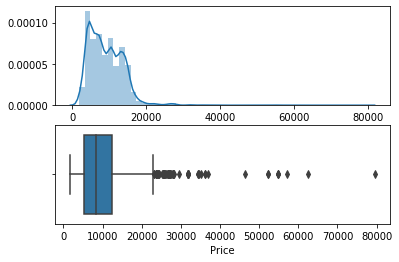

In [138]:
plt.figure(figsize=(20,10))
plot(data_train,'Price')

In [139]:
data_train['Price'].head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [140]:
data_train['Price'] = np.where(data_train['Price']>40000, data_train['Price'].median(), data_train['Price'])

In [141]:
X = data_train.drop('Price',axis=1)
y = data_train['Price']

In [142]:
from sklearn.feature_selection import mutual_info_classif

In [147]:
X.dtypes

Total_Stops                                 float64
Route1                                        int32
Route2                                        int32
Route3                                        int32
Route4                                        int32
Route5                                        int32
Air India                                     uint8
GoAir                                         uint8
IndiGo                                        uint8
Jet Airways                                   uint8
Jet Airways Business                          uint8
Multiple carriers                             uint8
Multiple carriers Premium economy             uint8
SpiceJet                                      uint8
Trujet                                        uint8
Vistara                                       uint8
Vistara Premium economy                       uint8
Chennai                                       uint8
Delhi                                         uint8
Kolkata     

In [152]:
drop_column(X, 'Date_of_Journey')

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [153]:
X.dtypes

Total_Stops                          float64
Route1                                 int32
Route2                                 int32
Route3                                 int32
Route4                                 int32
Route5                                 int32
Air India                              uint8
GoAir                                  uint8
IndiGo                                 uint8
Jet Airways                            uint8
Jet Airways Business                   uint8
Multiple carriers                      uint8
Multiple carriers Premium economy      uint8
SpiceJet                               uint8
Trujet                                 uint8
Vistara                                uint8
Vistara Premium economy                uint8
Chennai                                uint8
Delhi                                  uint8
Kolkata                                uint8
Mumbai                                 uint8
Cochin                                 uint8
Delhi     

In [154]:
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [156]:
data_train['Total_Stops'].head(40)

0     NaN
1     2.0
2     2.0
3     1.0
4     1.0
5     NaN
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    NaN
12    NaN
13    1.0
14    NaN
15    2.0
16    1.0
17    1.0
18    2.0
19    1.0
20    1.0
21    1.0
22    NaN
23    NaN
24    1.0
25    2.0
26    1.0
27    1.0
28    NaN
29    NaN
30    NaN
31    2.0
32    NaN
33    2.0
34    1.0
35    1.0
36    1.0
37    NaN
38    1.0
39    1.0
Name: Total_Stops, dtype: float64

In [157]:
stops = data_train['Total_Stops'].fillna(0)

In [158]:
stops

0        0.0
1        2.0
2        2.0
3        1.0
4        1.0
5        0.0
6        1.0
7        1.0
8        1.0
9        1.0
10       1.0
11       0.0
12       0.0
13       1.0
14       0.0
15       2.0
16       1.0
17       1.0
18       2.0
19       1.0
20       1.0
21       1.0
22       0.0
23       0.0
24       1.0
25       2.0
26       1.0
27       1.0
28       0.0
29       0.0
        ... 
10653    1.0
10654    0.0
10655    0.0
10656    0.0
10657    1.0
10658    0.0
10659    0.0
10660    0.0
10661    1.0
10662    2.0
10663    2.0
10664    0.0
10665    0.0
10666    1.0
10667    1.0
10668    2.0
10669    1.0
10670    2.0
10671    0.0
10672    2.0
10673    2.0
10674    1.0
10675    0.0
10676    1.0
10677    0.0
10678    0.0
10679    0.0
10680    0.0
10681    0.0
10682    2.0
Name: Total_Stops, Length: 10682, dtype: float64

In [159]:
data_train['Total_Stops'] = stops

In [160]:
X['Total_Stops'] = stops

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [161]:
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)

In [162]:
imp

,0
Total_Stops,2.134422
Route1,2.074177
Route2,2.749964
Route3,2.261160
Route4,1.524251
Route5,0.782492
Air India,0.776561
GoAir,0.090406
IndiGo,0.655535
Jet Airways,0.913675


In [163]:
from sklearn.model_selection import train_test_split

In [164]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [165]:
from sklearn import metrics
import pickle

In [169]:
def predict(ml_model, dump=0):
    model = ml_model.fit(X_train, y_train)
    print('Training Score: {}'.format(model.score(X_train, y_train)))
    y_pred = model.predict(X_test)
    print('Predictions are : {}'.format(y_pred))
    print('\n')
    r2_score = metrics.r2_score(y_test, y_pred)
    print('r2 score: {}'.format(r2_score))
    print('MAE: ',metrics.mean_absolute_error(y_test, y_pred))
    print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
    print('RMSE ',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    sns.distplot(y_test-y_pred)
    
    if dump==1:
        file = open('./model.pkl','wb')
        pickle.dump(model,file)

In [170]:
from sklearn.ensemble import RandomForestRegressor

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training Score: 0.9477740416733071
Predictions are : [ 9759.55  2248.   10491.95 ...  4354.9   8877.7  11216.6 ]


r2 score: 0.8061628822433466
MAE:  1180.8562634163009
MSE:  3757758.314934593
RMSE  1938.4938263854733


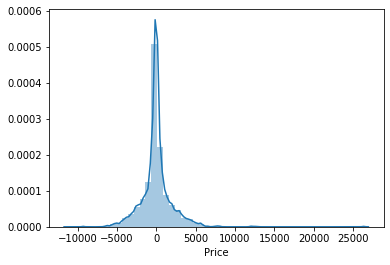

In [171]:
predict(RandomForestRegressor(), 1)

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier

Training Score: 0.8862492685781158
Predictions are : [ 8529.  2227. 13941. ...  5515.  8610. 11667.]


r2 score: 0.6646474613618969
MAE:  1426.6822648572766
MSE:  6501199.590079551
RMSE  2549.7450049131485


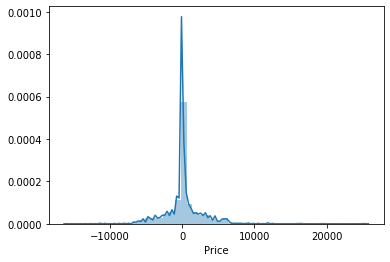

In [174]:
predict(DecisionTreeClassifier(), 1)

Training Score: 0.61771160590866
Predictions are : [11488.79462134  3959.08089679 11089.22836148 ...  3543.21000044
 10450.44877751 10715.79190382]


r2 score: 0.6086850353989249
MAE:  1943.842758870424
MSE:  7586096.404064762
RMSE  2754.286913897091


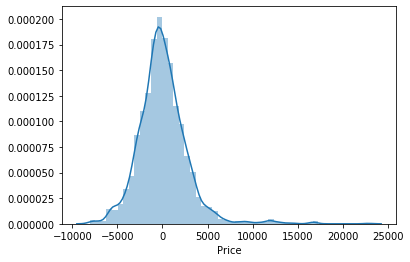

In [175]:
predict(LinearRegression(),1)

Training Score: 0.7807583685941488
Predictions are : [ 9905.2  2437.8 11876.8 ...  4120.6  9262.  10388.2]


r2 score: 0.6499561092250916
MAE:  1715.1171736078613
MSE:  6786008.564174076
RMSE  2604.9968453290066


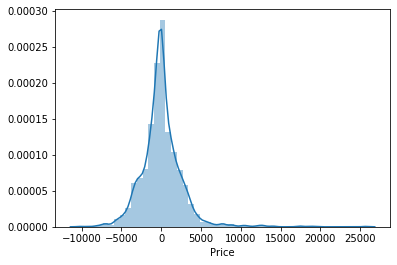

In [176]:
predict(KNeighborsRegressor(), 1)

In [177]:
from sklearn.model_selection import RandomizedSearchCV

In [180]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200, num=6)]

In [181]:
max_features=['auto','sqrt']

In [182]:
max_depth=[int(x) for x in np.linspace(5,30,num=4)]

In [183]:
min_samples_split=[5,10,15,100]

In [184]:
random_grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [186]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [187]:
reg = RandomForestRegressor()

In [188]:
rf_random = RandomizedSearchCV(estimator=reg, param_distributions=random_grid, cv=3, verbose=2, n_jobs=-1)

In [190]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_state=N

In [191]:
rf_random.best_params_

{'n_estimators': 760,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 13}

In [192]:
prediction = rf_random.predict(X_test)

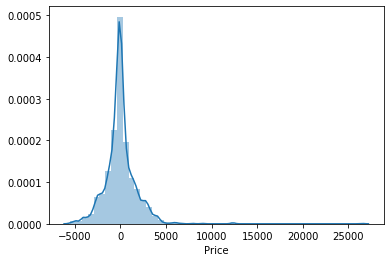

In [194]:
sns.distplot(y_test-prediction)

In [195]:
metrics.r2_score(y_test,prediction)

0.8457933089763467

In [196]:
print('MAE',metrics.mean_absolute_error(y_test,prediction))
print('MSE',metrics.mean_squared_error(y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE 1115.9944738274596
MSE 2989476.330019319
RMSE 1729.0102168637752


In [198]:
file = open('./RandomizedSearchCV.pkl','wb')
pickle.dump(rf_random,file)